# $t$-Tests

<img src="https://imgs.xkcd.com/comics/correlation_2x.png" alt="xkcd" width="500"/>

In [15]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

## Normal Data

[numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)



In [16]:
# # Group A.
# group_a = np.random.normal(5, 2, 30)

# # Group B.
# group_b = np.random.normal(5, 2, 30)

# try:
# group_a = np.random.normal(7, 2, 30) # mean, std, n
# group_b = np.random.normal(3, 2, 30)

# try:
group_a = np.random.normal(0.07, 0.02, 30) # mean, std, n
group_b = np.random.normal(0.03, 0.02, 30)

# Show.
group_a, group_b

(array([0.07131631, 0.06569733, 0.08468677, 0.10887755, 0.08749338,
        0.03685397, 0.09154785, 0.06393572, 0.05125147, 0.05779475,
        0.05803741, 0.09379602, 0.0487052 , 0.07768739, 0.04711298,
        0.06391684, 0.06326643, 0.07227803, 0.08729525, 0.05000466,
        0.07879921, 0.08447117, 0.07001516, 0.05330524, 0.07993995,
        0.07171192, 0.07214729, 0.0772239 , 0.06382445, 0.09165039]),
 array([-0.00311207,  0.0123306 ,  0.02596893,  0.06582947,  0.02333041,
         0.04290745,  0.0560176 ,  0.0309734 ,  0.04184463,  0.01385141,
         0.03170638,  0.02852996,  0.0099527 ,  0.02813966,  0.0178903 ,
         0.00179233,  0.00411136,  0.03093951,  0.02397734,  0.02909513,
         0.02309122,  0.02692558,  0.08553483,  0.01138285,  0.00216163,
         0.03710393,  0.06436053,  0.03453532,  0.05385565,  0.01600766]))

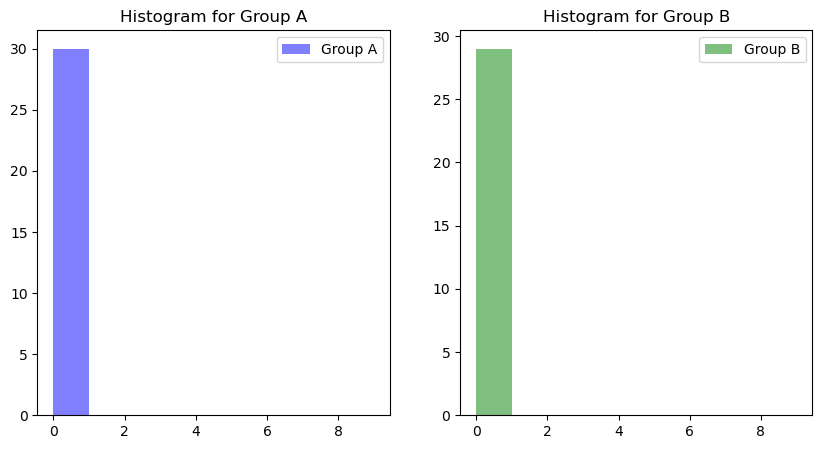

In [17]:
# Create an empty data frame.
#fig, ax = plt.subplots(2,1) # dont have to do subplot if just 1 plot, but can do 2 plots on 1 figure
# try:
#fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Create histogram.
ax[0].hist(group_a, bins=range(10), color='blue', alpha=0.5, label='Group A')
ax[0].set_title('Histogram for Group A')
ax[0].legend()

# Create histogram.
ax[1].hist(group_b, bins=range(10), color='green', alpha=0.5, label='Group B');
ax[1].set_title('Histogram for Group B')
ax[1].legend()

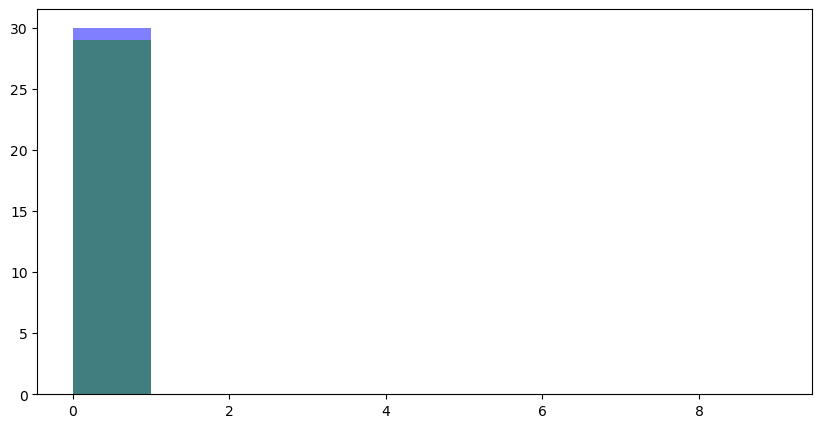

In [18]:
# Create an empty data frame.
fig, ax = plt.subplots(figsize=(10, 5)) # dont have to do subplot if just 1 plot, but can do 2 plots on 1 same axis

# Create histogram.
ax.hist(group_a, bins=range(10), color='blue', alpha=0.5, label='Group A') # alpha is transparency

# Create histogram.
ax.hist(group_b, bins=range(10), color='green', alpha=0.5, label='Group B');

# if bins=10 but the start and finish dont allign bc they start at the smallest number in each dataset
# so use range(10)

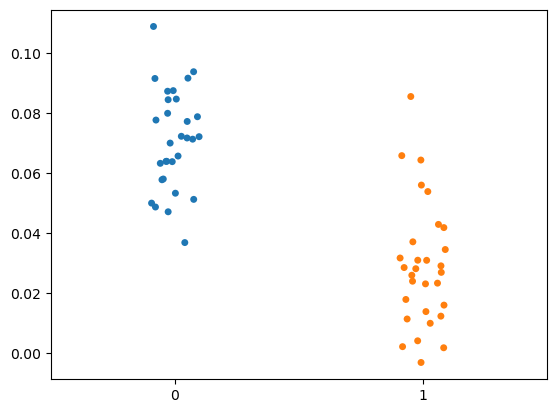

In [19]:
# Create a strip plot.
sns.stripplot(data=[group_a, group_b]);

# orage looks lower than blue, but significant overlaps too

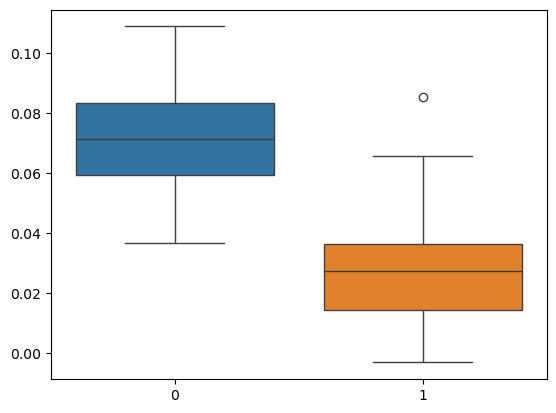

In [20]:
# Box plot.
sns.boxplot(data=[group_a, group_b]);

# order the values
# line in box is median
# box contains 50% of values, 23 higher, 25 lower
# whisker - 1.5 times from inbox height (interquartile range)
# there can be outlieers beyond whiskers

## Independent Samples $t$-Test

[scipy.stats.
ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

**Null Hypothesis:** the population means are equal.

In [21]:
# Perform a t-test.
stats.ttest_ind(group_a, group_b)

# tvalue is dimensionless, no units
# pvalue says, whats the probability of seeing a value as extreme as 8.13?
# pvalue is so small
# so if cut off is 0.05, 
# the probability of seeing data as extreme as i've seen is < 0.05, 
# im rejecting null hypo, so means are not equal
# look at student's t probability distribution,
# most of the values are under the curve, but we are way out in the tail5
# so im going to reject the idea that we are actually in the situation where the population means are equal

TtestResult(statistic=8.670469801071897, pvalue=4.656555913352427e-12, df=58.0)

In [22]:
# Group c.
group_c = np.random.normal(5, 2, 30)

# Group d.
group_d = np.random.normal(5, 2, 30)

# Perform a t-test.
stats.ttest_ind(group_c, group_d)

TtestResult(statistic=-0.8624939476240825, pvalue=0.3919680455111737, df=58.0)

the pvalue of seeing the value as extreme as 0.5223 is 60% (higher than treshold), so we have no evidence to reject null, so means are equal

## Paired Samples $t$-Test

In [23]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

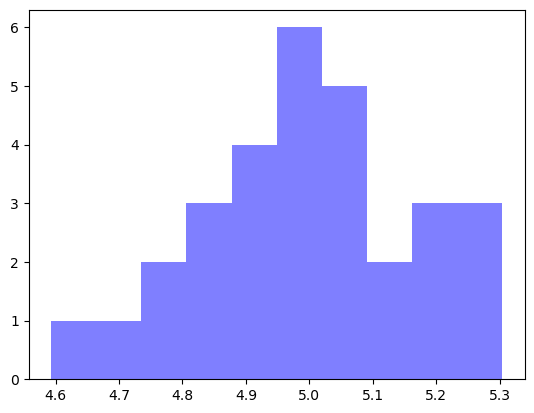

In [24]:
# Histgoram.
plt.hist(group_a, color='blue', alpha=0.5, label='Group A');

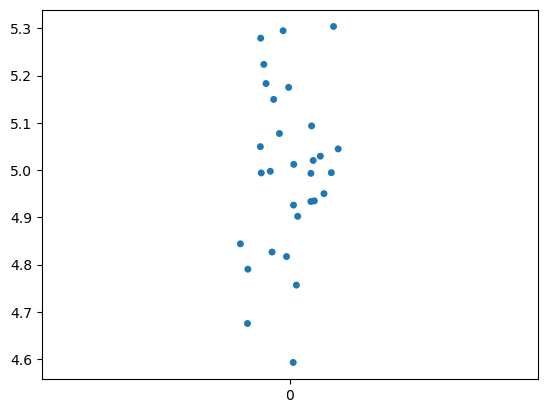

In [25]:
# Strip plot.
sns.stripplot(data=[group_a]);

In [26]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

# Add normally distributed values.
group_b = group_a + np.random.normal(0.2, 0.1, 30)

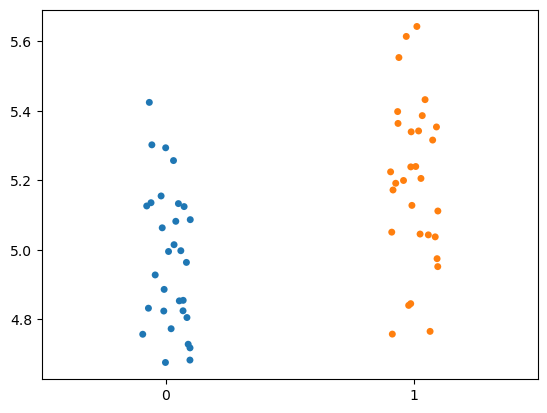

In [27]:
# Strip plot.
sns.stripplot(data=[group_a, group_b]);

### scipy.stats.ttest_rel

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel

In [28]:
# Paired samples t-test.
stats.ttest_rel(group_a, group_b)

TtestResult(statistic=-13.519149060991941, pvalue=4.748923617403702e-14, df=29)

## End